<a href="https://colab.research.google.com/github/AnnisaFitry/PCVK_Genap_2023/blob/main/week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WEEK 12

          Nama   : Annisa Fitri Yuliandra
          Kelas  : TI 3B
          NIM    : 2041720123

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, buat notebook baru dan beri nama "Week12.ipynb". Kemudian import beberapa library dan akses folder yang ada di Drive Anda dengan seperti biasa.

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import PIL
import io
import html
import time
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Lakukan Face Detection untuk image object lain yang tersedia pada (/images/facedet). Tampilkan seperti pada contoh berikut. Perhatikan pada hasil face detection dibawah ini. Secara keseluruhan, face detection dapat dilakukan dengan baik, bahkan untuk image berupa gambar bukan foto, wajah bermasker, atau wajah yang berukuran kecil (solvay).

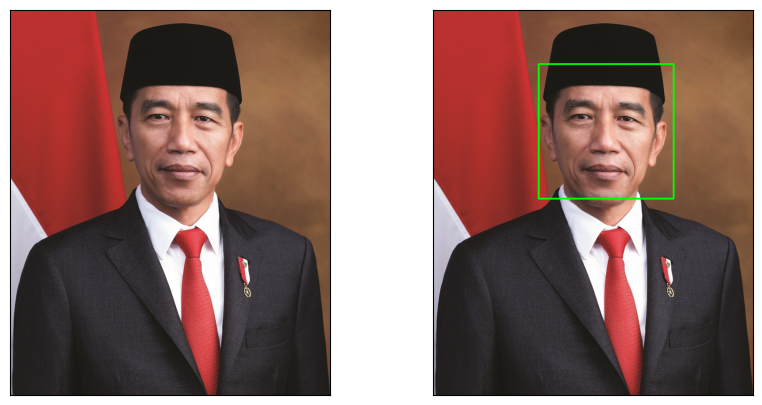

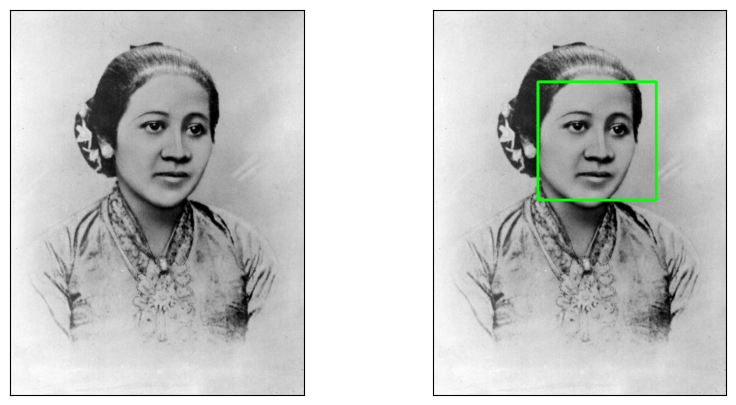

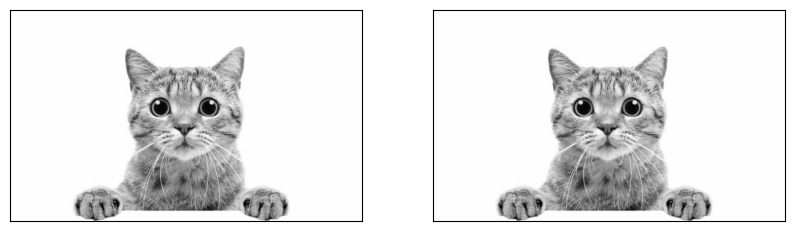

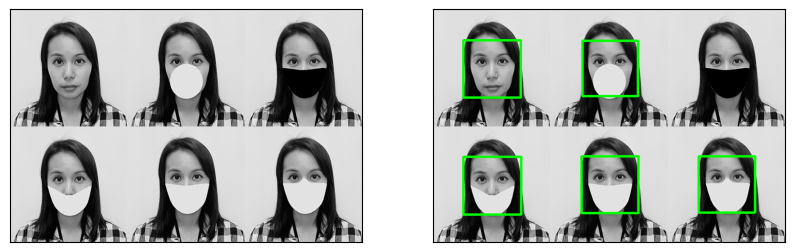

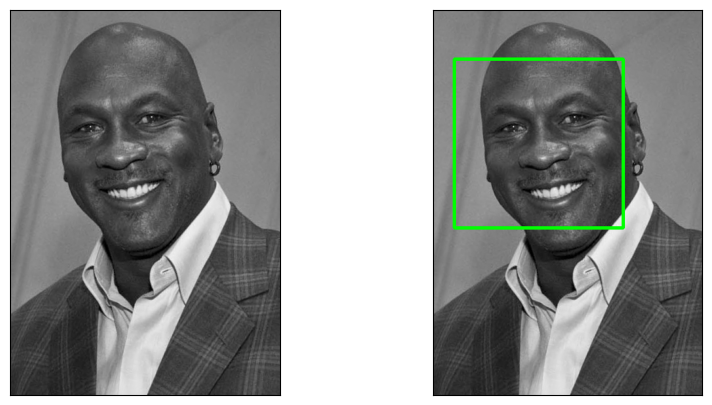

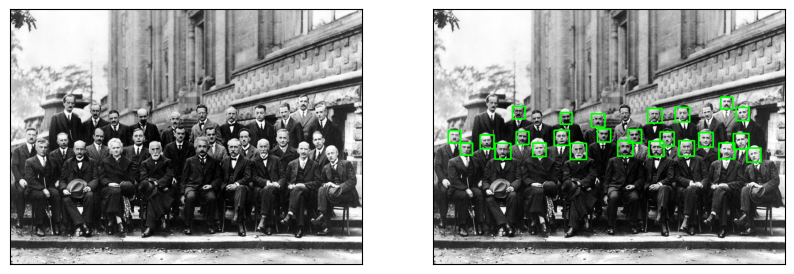

In [3]:
# Face detection untuk image object yang tersedia pada (/images/facedet)

cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/images/Images/haarcascades/haarcascade_frontalface_alt2.xml')

# Input image
input1 = cv.imread('/content/drive/MyDrive/images/Images/facedet/jokowi.jpg')
input1 = cv.cvtColor(input1, cv.COLOR_BGR2RGB)
input2 = cv.imread('/content/drive/MyDrive/images/Images/facedet/kartini.jpg')
input2 = cv.cvtColor(input2, cv.COLOR_BGR2RGB)
input3 = cv.imread('/content/drive/MyDrive/images/Images/facedet/kucing.jpg')
input3 = cv.cvtColor(input3, cv.COLOR_BGR2RGB)
input4 = cv.imread('/content/drive/MyDrive/images/Images/facedet/mask.png')
input4 = cv.cvtColor(input4, cv.COLOR_BGR2RGB)
input5 = cv.imread('/content/drive/MyDrive/images/Images/facedet/mjordan.jpg')
input5 = cv.cvtColor(input5, cv.COLOR_BGR2RGB)
input6 = cv.imread('/content/drive/MyDrive/images/Images/facedet/solvayconf.jpg')
input6 = cv.cvtColor(input6, cv.COLOR_BGR2RGB)
input_image = [input1, input2, input3, input4, input5, input6]

# output image
output1 = input1.copy()
output2 = input2.copy()
output3 = input3.copy()
output4 = input4.copy()
output5 = input5.copy()
output6 = input6.copy()
output_image = [output1, output2, output3, output4, output5, output6]

# fungsi untuk mengubah gambar menjadi grayscale
def grayImage(img):
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      # Menggunakan metode grayscale 𝐿𝑢𝑚𝑖𝑛𝑎𝑛𝑐𝑒 
      img[i,j,:] = int((0.21 * img[i,j,0]) + (0.72 * img[i,j,1]) + (0.07 * img[i,j,2]))
  return img

# fungsi untuk mendeteksi wajah pada gambar
def face_detection(image):
  roi_wajah = cascade_wajah.detectMultiScale(image, scaleFactor = 1.2, minNeighbors = 5)
  for(x,y,w,h) in roi_wajah:
    cv.rectangle(image,(x,y),(x+w,y+h),(0,255,0),3)
  return image

# looping untuk mengubah beberapa gambar menjadi grayscale
for g in range(2, 5):
  input_image[g] = grayImage(input_image[g])
  output_image[g] = grayImage(output_image[g])

# looping untuk menjalankan fungsi deteksi wajah pada setiap gambar
for i in range(len(output_image)):
  output_image[i] = face_detection(output_image[i])
  plt.figure(figsize = (10,5))
  plt.subplot(1,2,1),plt.imshow(input_image[i])
  plt.xticks([]), plt.yticks([])
  plt.subplot(1,2,2),plt.imshow(output_image[i])
  plt.xticks([]), plt.yticks([])
  plt.show()

3. Pada Soal No.2. wajah kucing tidak bisa dideteksi dengan baik. Lakukan deteksi wajah kucing  hingga muncul rectangle pada bagian wajahnya seperti gambar berikut. Petunjuk pada soal ini,  perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml yang ada jika  memang telah disediakan. Jika belum ada, coba cari dengan searching melalui search engines. 

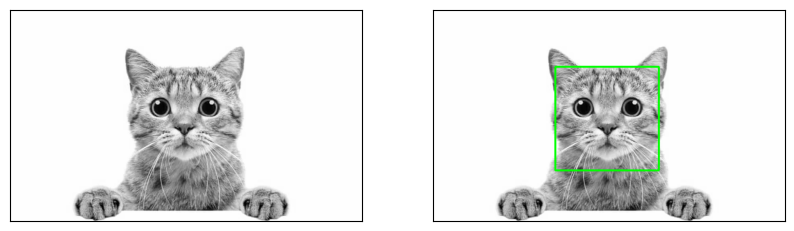

In [4]:
# Deteksi wajah kucing
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/images/Images/haarcascades/haarcascade_frontalcatface.xml')

# input image
input_image = cv.imread('/content/drive/MyDrive/images/Images/facedet/kucing.jpg')
input_image = cv.cvtColor(input3, cv.COLOR_BGR2RGB)

# Mengubah gambar menjadi grayscale menggunakan fungsi yang telah dibuat sebelumnya
input_image = grayImage(input_image)

# output image 
output_image = input_image.copy()

# deteksi wajah kucing
catFace = cascade_wajah.detectMultiScale(output_image)
(x,y,w,h) = catFace[0]
cv.rectangle(output_image,(x,y),(x+w,y+h),(0,255,0),3)

# Membuat figure dan menampilkan input dan output
plt.figure(figsize = (10,5))
plt.subplot(1,2,1),plt.imshow(input_image)
plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(output_image)
plt.xticks([]), plt.yticks([])
plt.show()

4. Cobakan juga untuk eyes detection pada gambar “Jokowi.jpg”, sehingga menghasilkan gambar  seperti berikut. 

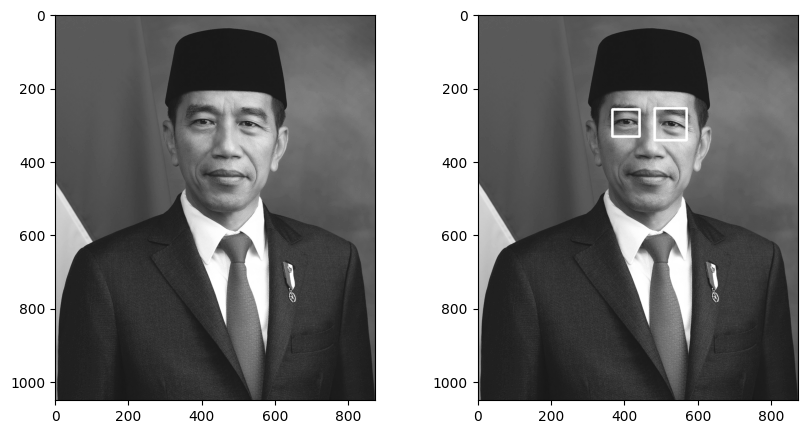

In [5]:
# eyes detection
cascade_eyes = cv.CascadeClassifier('/content/drive/MyDrive/images/Images/haarcascades/haarcascade_eye.xml')

# input image
input_image = cv.imread('/content/drive/MyDrive/images/Images/facedet/jokowi.jpg', 0)

# output image
output_image = input_image.copy()

# deteksi mata pada gambar
eyes = cascade_eyes.detectMultiScale(output_image)
for(x,y,w,h) in eyes:
    cv.rectangle(output_image,(x,y),(x+w,y+h),(255,255,255),5)

# Membuat figure dan menampilkan input dan output
plt.figure(figsize = (10,5))
plt.subplot(1,2,1),plt.imshow(input_image, cmap='gray')
plt.subplot(1,2,2),plt.imshow(output_image, cmap='gray')
plt.show()

5. Lakukan Face Tracking menggunakan Google Colab. Petunjuk, Tutorial selengkapnya tentang akses  kamera dan FaceDetection pada google colab dapat dilihat di link berikut: https://www.youtube.com/watch?v=YiWh7QvVH60 

In [6]:

def js_to_image(js_reply):
  image_bytes = b64decode(js_reply.split(',')[1])
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  img = cv.imdecode(jpg_as_np, flags=1)

  return img


def bbox_to_bytes(bbox_array):
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  bbox_PIL.save(iobuf, format='png')
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64decode(iobuf.getvalue()), 'utf-8')))
  
  return bbox_to_bytes
     

In [7]:
face_cascade = cv.CascadeClassifier(cv.samples.findFile(cv.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [8]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality){
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  data = eval_js('takePhoto({})'.format(quality))
  img = js_to_image(data)
  gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
  print(gray.shape)
  faces = face_cascade.detectMultiScale(gray)
  for(x,y,w,h) in faces:
    img = cv.rectangle(img,(x,y),(x+w,y+h),(255, 0, 0),2)

  cv.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


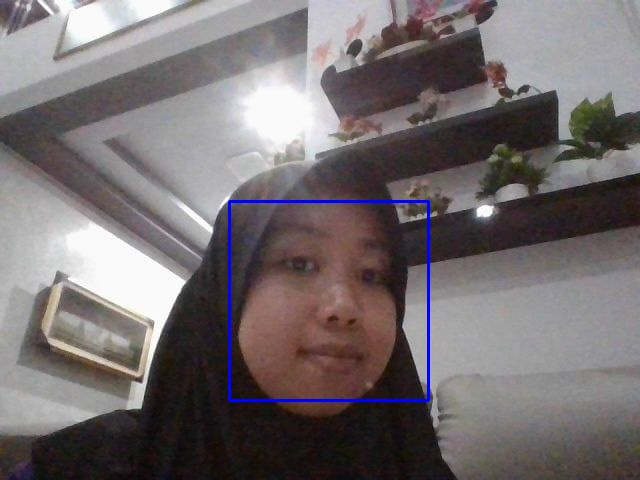

In [9]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  display(Image(filename))
except Exception as err:
  print(str(err))

6. Lakukan deteksi bagian wajah gambar “mjordan.jpg”, kemudian tindih bagian wajah tersebut  dengan gambar “smile.png”. Berikut contoh keluarannya. 

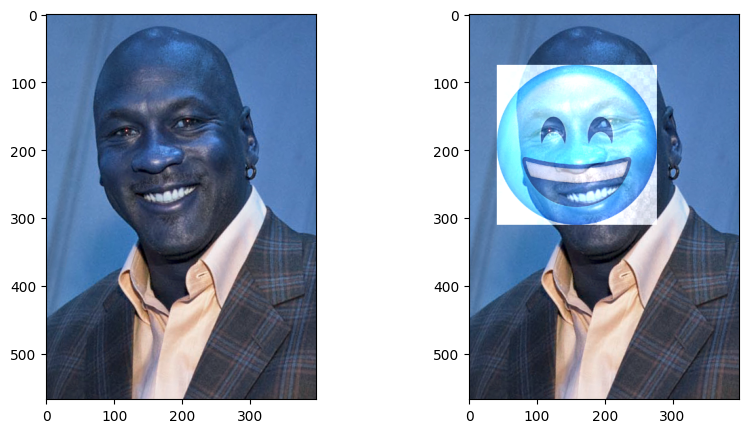

In [11]:
# Load the face cascade classifier
cascade_face = cv.CascadeClassifier('/content/drive/MyDrive/images/Images/haarcascades/haarcascade_frontalface_alt2.xml')

# Load the input image
input_image = cv.imread('/content/drive/MyDrive/images/Images/facedet/mjordan.jpg')
output_image = input_image.copy()

# Detect faces in the input image
faces = cascade_face.detectMultiScale(cv.cvtColor(input_image, cv.COLOR_BGR2GRAY), scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Load the smile image
smile_image = cv.imread('/content/drive/MyDrive/images/Images/facedet/smile.png')

# Overlay smile on detected faces
for (x, y, w, h) in faces:
    # Resize the smile image to fit the face
    resized_smile = cv.resize(smile_image, (w, h))
    
    # Define the region of interest (ROI) for the face
    roi = output_image[y:y+h, x:x+w]
    
    # Resize the ROI to match the smile image dimensions
    resized_roi = cv.resize(roi, (w, h))
    
    # Add the smile to the resized ROI
    final_roi = cv.addWeighted(resized_roi, 1, resized_smile, 0.7, 0)
    
    # Replace the ROI in the output image with the smile
    output_image[y:y+h, x:x+w] = final_roi


plt.figure(figsize = (10,5))
plt.subplot(1,2,1),plt.imshow(input_image, cmap='gray')
plt.subplot(1,2,2),plt.imshow(output_image, cmap='gray')
plt.show()

7. Lakukan deteksi wajah dengan menggunakan bounding box berwarna hitam, deteksi mata  menggunakan bounding box berwarna putih, dan deteksi mata kanan menggunakan bounding box  berwarna merah. Gunakan gambar “people.jpg” untuk mengerjakan soal pada nomor ini. Berikut  contoh keluarannya.  

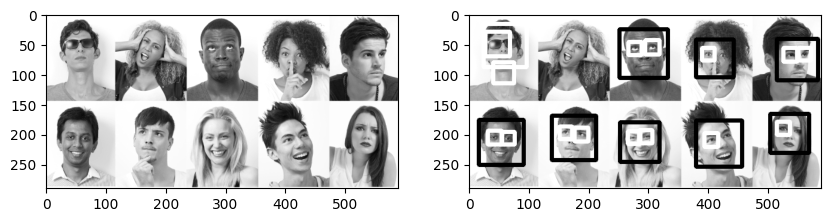

In [15]:
# face detection
cascade_faces = cv.CascadeClassifier('/content/drive/MyDrive/images/Images/haarcascades/haarcascade_frontalface_alt2.xml')

# eyes detection
cascade_eyes = cv.CascadeClassifier('/content/drive/MyDrive/images/Images/haarcascades/haarcascade_eye.xml')

# eyes right detection
cascade_eyes_r = cv.CascadeClassifier('/content/drive/MyDrive/images/Images/haarcascades/haarcascade_righteye_2splits.xml')

# input image
input_image = cv.imread('/content/drive/MyDrive/images/Images/facedet/people.jpg', 0)

# output image
output_image = input_image.copy()

# deteksi mata pada gambar
eyes = cascade_eyes.detectMultiScale(output_image)
for(x,y,w,h) in eyes:
    cv.rectangle(output_image,(x,y),(x+w,y+h),(255,255,255),5)

# deteksi mata pada gambar
right = cascade_eyes_r.detectMultiScale(output_image)
for(x,y,w,h) in right:
    cv.rectangle(output_image,(x,y),(x+w,y+h),(255,0,0),5)

# deteksi wajah pada gambar
faces = cascade_faces.detectMultiScale(output_image)
for(x,y,w,h) in faces:
    cv.rectangle(output_image,(x,y),(x+w,y+h),(0,0,0),5)

# Membuat figure dan menampilkan input dan output
plt.figure(figsize = (10,5))
plt.subplot(1,2,1),plt.imshow(input_image, cmap='gray')
plt.subplot(1,2,2),plt.imshow(output_image, cmap='gray')
plt.show()